In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from math import exp,sqrt
from scipy import optimize as op

# Data Preprocessing

In [2]:
data = pd.read_csv('./data/04_cricket_1999to2011.csv')
data = data[data['Innings']==1]
for i in range(len(data)):
    if data.iloc[i]['Over']==1:
        data.iloc[i]['Total.Runs'] = data.iloc[i]['Runs']
    else:
        data.iloc[i]['Total.Runs'] = data.iloc[i]['Runs'] + data.iloc[i-1]['Total.Runs']
country_data = data.filter(items=['Over','Innings.Total.Runs','Total.Runs','Wickets.in.Hand'])

/Users/adarshshah/opt/miniconda3/envs/e0_259_da/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/adarshshah/opt/miniconda3/envs/e0_259_da/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Objective function 1

In [5]:
def obj1(x,overs,runs):
    z,b = x
    func = np.multiply(z,np.subtract(1,np.exp(np.multiply(-1*b,overs))))
    error = np.subtract(runs,func)
    error = sqrt(np.sum(np.square(error)))/len(runs)
    return error

def DuckworthLewis20Params():
    Z0 = np.zeros(10)
    b = np.zeros(10)
    errors = np.zeros(10)
    cdata = country_data
    for w in range(1,11):
        d = cdata[cdata['Wickets.in.Hand']==w]
        overs = 50-d['Over']
        runs = d['Innings.Total.Runs']-d['Total.Runs']
        Z0[w-1],b[w-1]=op.fmin(func=obj1,x0=np.array([250,0.1]),args=(overs,runs),disp=False)
        errors[w-1] = obj1([Z0[w-1],b[w-1]],overs,runs)
    return Z0,b,errors

def plot1(Z,b):
    func = lambda w,o : Z[w-1]*(1-exp(-1*b[w-1]*o))
    for w in range(1,11):
        x = range(0,51)
        y = np.array([func(w,o) for o in range(0,51)])
        pyplot.plot(x,y,label=str(w))
        pyplot.text(x[-5],y[-5],w)
    pyplot.show()

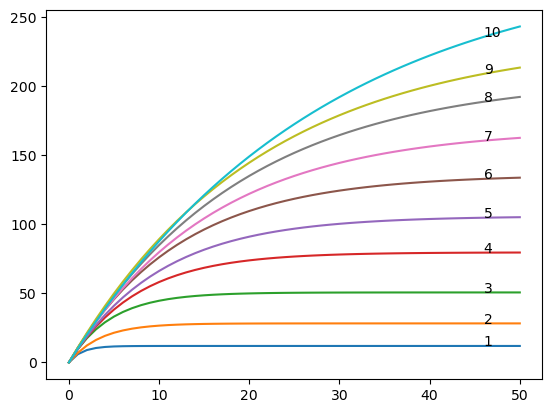

Z0		b		errors
11.96		0.69934		0.29
28.29		0.28592		0.35
50.70		0.21305		0.37
79.70		0.13111		0.37
105.94		0.09814		0.35
136.02		0.08200		0.35
169.65		0.06359		0.36
206.92		0.05287		0.41
235.01		0.04777		0.47
292.26		0.03570		0.55


In [6]:
Z0,b,errors = DuckworthLewis20Params()
plot1(Z0,b)
print('Z0\t\tb\t\terrors')
for i in range(10):
    print(f'{Z0[i]:.2f}\t\t{b[i]:.5f}\t\t{errors[i]:.2f}')

# Objective Function 2

In [3]:
def obj2(Z,data):
    L=Z[10]
    error=0
    for w in range(1,11):
        d = data[data['Wickets.in.Hand']==w]
        overs = 50-d['Over']
        runs = d['Innings.Total.Runs']-d['Total.Runs']
        fruns = Z[w-1]*np.subtract(1,np.exp(np.multiply(-1*L/Z[w-1],overs)))
        error+=sqrt(np.sum(np.square(np.subtract(runs,fruns))))/len(data)
    return error

def DuckworthLewis11Params():
    x0 = 250*np.ones(11)
    x0[10]=0.1
    cdata = country_data
    errors = np.zeros(10)
    res=op.minimize(fun=obj2,x0=x0,args=(cdata))
    Z = res.x[:10]
    L = res.x[10]
    for w in range(1,11):
        d = cdata[cdata['Wickets.in.Hand']==w]
        overs = 50-d['Over']
        runs = d['Innings.Total.Runs']-d['Total.Runs']
        fruns = Z[w-1]*np.subtract(1,np.exp(np.multiply(-1*L/Z[w-1],overs)))
        errors[w-1]=sqrt(np.sum(np.square(np.subtract(runs,fruns))))/len(cdata)
    return Z,L,errors

def plot2(Z,L):
    func = lambda w,o : Z[w-1]*(1-exp(-1*L*o/Z[w-1]))
    for w in range(1,11):
        x = range(0,51)
        y = np.array([func(w,o) for o in range(0,51)])
        pyplot.plot(x,y,label=str(w))
        pyplot.text(x[-5],y[-5],w)
    pyplot.show()

In [4]:
Z0,L,errors = DuckworthLewis11Params()
plot2(Z0,L)
print('Z0\t\tL\t\terrors')
for i in range(10):
    print(f'{Z0[i]:.2f}\t\t{L:.5f}\t\t{errors[i]:.2f}')

NameError: name 'b' is not defined